In [1]:
#Nichenet environment

library(repr)
library(tidyverse)
library(viridis)
library(patchwork)
library(hrbrthemes)
library(circlize)
library(chorddiag)
library(tidyr)
library(dplyr)
library(stringr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

circlize version 0.4.15
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in publishe

In [3]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.1 LTS

Matrix products: default
BLAS/LAPACK: /home/jovyan/my-conda-envs/nichenet/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] chorddiag_0.1.3   circlize_0.4.15   hrbrthemes_0.8.0  patchwork_1.1.2  
 [5] viridis_0.6.2     viridisLite_0.4.1 forcats_0.5.2     stringr_1.5.0    
 [9] dplyr_1.1.0       purrr_1.0.1       readr_2.1.2       tidyr_1.3.0      
[13] tibble_3.1.8      ggplot2_3.4.0     tidyverse_1.3.2   repr_1.1.4    

# Immune-pre-dermal condensate interactions: ILC3/LTi

In [4]:
#load csv of summary of early interactions
summary_df = means <- read.delim('/home/jovyan/mount_farm/nfs/nfs/team298/hg6/Fetal_skin/data/cpdb_outs/early_fs/summary.tsv', 
                                 check.names = FALSE)
summary_df

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
FAM3C|HLA-C,Arterial|ASDC,0.924,0.000,0.0000000
MIF|CD74,Arterial|ASDC,3.147,0.000,0.0000000
GRN|TNFRSF1A,Arterial|ASDC,0.705,0.006,0.3259091
GRN|TNFRSF1B,Arterial|ASDC,0.832,0.000,0.0000000
COPA|CD74,Arterial|ASDC,2.538,0.000,0.0000000
CD44|HBEGF,ASDC|Arterial,0.562,0.030,1.0000000
GRN|SORT1,ASDC|Arterial,0.767,0.000,0.0000000
LGALS9|DAG1,ASDC|Arterial,0.184,0.047,1.0000000
TNF|NOTCH1,ASDC|Arterial,0.486,0.000,0.0000000


In [5]:
#filter to keep only required cell pairs and gene pairs of interest with significant adjusted p-value
required_cellpairs = c('Pre-dermal condensate|ILC3', 'Pre-dermal condensate|LTi')
required_genepairs = c('CXCL12|DPP4', 'CXCL2|DPP4', 'CXCL12|CXCR4')
filtered_df = filter(summary_df, celltype_pair %in% required_cellpairs & gene_pair %in% required_genepairs & padj<0.05)
filtered_df

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
CXCL12|DPP4,Pre-dermal condensate|ILC3,0.995,0,0
CXCL12|DPP4,Pre-dermal condensate|LTi,0.987,0,0
CXCL12|CXCR4,Pre-dermal condensate|ILC3,1.558,0,0
CXCL12|CXCR4,Pre-dermal condensate|LTi,1.611,0,0


In [6]:
#separate sender/receiver cells and ligand/receptor genes
filtered_df <- filtered_df %>% separate(celltype_pair, c("sender", "receiver"), "\\|")
filtered_df <- filtered_df %>% separate(gene_pair, c("ligand", "receptor"), "\\|")
filtered_df

ligand,receptor,sender,receiver,mean,p,padj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
CXCL12,DPP4,Pre-dermal condensate,ILC3,0.995,0,0
CXCL12,DPP4,Pre-dermal condensate,LTi,0.987,0,0
CXCL12,CXCR4,Pre-dermal condensate,ILC3,1.558,0,0
CXCL12,CXCR4,Pre-dermal condensate,LTi,1.611,0,0


In [8]:
#create cell_gene pairs for plot sections
filtered_df$from <- paste(filtered_df$sender, filtered_df$ligand, sep='_')
filtered_df$to <- paste(filtered_df$receiver, filtered_df$receptor, sep='_')
filtered_df

ligand,receptor,sender,receiver,mean,p,padj,from,to
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
CXCL12,DPP4,Pre-dermal condensate,ILC3,0.995,0,0,Pre-dermal condensate_CXCL12,ILC3_DPP4
CXCL12,DPP4,Pre-dermal condensate,LTi,0.987,0,0,Pre-dermal condensate_CXCL12,LTi_DPP4
CXCL12,CXCR4,Pre-dermal condensate,ILC3,1.558,0,0,Pre-dermal condensate_CXCL12,ILC3_CXCR4
CXCL12,CXCR4,Pre-dermal condensate,LTi,1.611,0,0,Pre-dermal condensate_CXCL12,LTi_CXCR4


In [12]:
#re-order columns
filtered_df <- filtered_df[, c('from', 'to', 'mean', 'sender', 'receiver', 'ligand', 'receptor')]
filtered_df

from,to,mean,sender,receiver,ligand,receptor
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
Pre-dermal condensate_CXCL12,ILC3_DPP4,0.995,Pre-dermal condensate,ILC3,CXCL12,DPP4
Pre-dermal condensate_CXCL12,LTi_DPP4,0.987,Pre-dermal condensate,LTi,CXCL12,DPP4
Pre-dermal condensate_CXCL12,ILC3_CXCR4,1.558,Pre-dermal condensate,ILC3,CXCL12,CXCR4
Pre-dermal condensate_CXCL12,LTi_CXCR4,1.611,Pre-dermal condensate,LTi,CXCL12,CXCR4


In [11]:
nm = unique(unlist(c(filtered_df$from, filtered_df$to)))
nm

[1] "Pre-dermal condensate_CXCL12" "ILC3_DPP4"                   
[3] "LTi_DPP4"                     "ILC3_CXCR4"                  
[5] "LTi_CXCR4"

In [13]:
#create groups by cell type
group = structure(gsub("_.*", "", nm), names = nm)
group

Pre-dermal condensate_CXCL12                    ILC3_DPP4 
     "Pre-dermal condensate"                       "ILC3" 
                    LTi_DPP4                   ILC3_CXCR4 
                       "LTi"                       "ILC3" 
                   LTi_CXCR4 
                       "LTi"

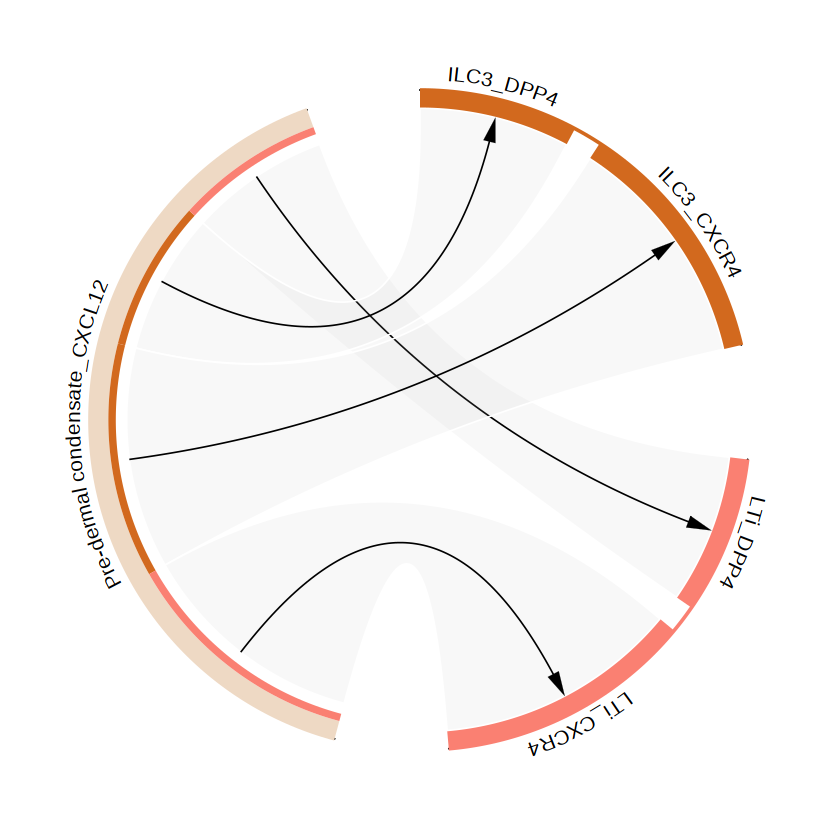

In [15]:
#plot
circos.clear()
#pdf('/home/jovyan/mount_farm/nfs/nfs/team298/hg6/Fetal_skin/out_files/circos_ILC3_v3.pdf')
circos.par(start.degree = 90, gap.degree = 4, track.margin = c(-0.1, 0.1), cell.padding=c(0.02, 1.00, 0.02, 1.00), points.overflow.warning = FALSE)
#par(mar = rep(0, 4))
#cell.padding=c(0.02, 1.00, 0.02, 1.00)

grid.col=c('Pre-dermal condensate_CXCL12' = "#eed9c4",
           'ILC3_DPP4' = "#D2691E",
           'ILC3_CXCR4' = '#D2691E',
           'LTi_DPP4' = 'salmon',
           'LTi_CXCR4' = 'salmon')

# Base plot
chordDiagram(
  x = filtered_df, 
  grid.col = grid.col,
  col = 'grey',
  transparency = 0.9,
  directional = 1,
  direction.type = c("arrows", "diffHeight"), 
  diffHeight  = 0.05,
  link.target.prop = TRUE,
  target.prop.height = mm_h(1.5), # set to zero to remove 1 layer and set above to False
  preAllocateTracks = NULL,
  annotationTrack = "grid", 
  #annotationTrackHeight = convert_height(c(5, 2), "mm"),
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "triangle",
  #link.arr.length = 0.02,
  #link.arr.width = 0.01,
  link.sort = TRUE, 
  link.largest.ontop = TRUE,
  link.border = 'white',
  link.lwd = 1, #to change white space between grey links, original=7
  group = group,
  big.gap = 20,
  small.gap = 5)
# Add text and axis
circos.trackPlotRegion(
  track.index = 1,
  bg.border = NA, 
  panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(
      x = mean(xlim), 
      y = 2, 
      labels = sector.name, 
      facing = "bending", 
      cex = 1)
      circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0, labels=FALSE, sector.index = sector.name)     
  }
)

highlight.sector(c('Pre-dermal condensate_CXCL12'), col = "#eed9c4", 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('ILC3_DPP4', 'ILC3_CXCR4'), col = "#D2691E", 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('LTi_DPP4', 'LTi_CXCR4'), col = "salmon", 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
gg2 <- recordPlot()
#dev.off()

# Immune-WNT2+ fibroblast interactions: LYVE1+ and TREM2+ macrophages

In [22]:
#load csv of summary of early interactions
summary_df_early = means <- read.delim('/home/jovyan/mount_farm/nfs/nfs/team298/hg6/Fetal_skin/data/cpdb_outs/early_fs/summary.tsv', 
                                       check.names = FALSE)
summary_df_early

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
FAM3C|HLA-C,Arterial|ASDC,0.924,0.000,0.0000000
MIF|CD74,Arterial|ASDC,3.147,0.000,0.0000000
GRN|TNFRSF1A,Arterial|ASDC,0.705,0.006,0.3259091
GRN|TNFRSF1B,Arterial|ASDC,0.832,0.000,0.0000000
COPA|CD74,Arterial|ASDC,2.538,0.000,0.0000000
CD44|HBEGF,ASDC|Arterial,0.562,0.030,1.0000000
GRN|SORT1,ASDC|Arterial,0.767,0.000,0.0000000
LGALS9|DAG1,ASDC|Arterial,0.184,0.047,1.0000000
TNF|NOTCH1,ASDC|Arterial,0.486,0.000,0.0000000


In [17]:
#filter to keep only required cell pairs and gene pairs of interest with significant adjusted p-value for LYVE1+ macrophage
required_cellpairs2 = c('LYVE1++ macrophage|WNT2+ fibroblast', 'WNT2+ fibroblast|LYVE1++ macrophage')
required_genepairs2 = c('IGF1|IGF1R', 'PDGFB|PDGFRB', 'PDGFB|PDGFRA', 'GRN|EGFR', 'PDGFC|PDGFRA')
filtered_df3 = filter(summary_df_early, celltype_pair %in% required_cellpairs2 & gene_pair %in% required_genepairs2 & padj<0.05)
filtered_df3

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
IGF1|IGF1R,LYVE1++ macrophage|WNT2+ fibroblast,0.368,0,0
PDGFB|PDGFRB,LYVE1++ macrophage|WNT2+ fibroblast,0.220,0,0
PDGFB|PDGFRA,LYVE1++ macrophage|WNT2+ fibroblast,0.415,0,0
GRN|EGFR,LYVE1++ macrophage|WNT2+ fibroblast,0.763,0,0


In [18]:
#separate sender/receiver cells and ligand/receptor genes
filtered_df3 <- filtered_df3 %>% separate(celltype_pair, c("sender", "receiver"), "\\|")
filtered_df3 <- filtered_df3 %>% separate(gene_pair, c("ligand", "receptor"), "\\|")
filtered_df3

ligand,receptor,sender,receiver,mean,p,padj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
IGF1,IGF1R,LYVE1++ macrophage,WNT2+ fibroblast,0.368,0,0
PDGFB,PDGFRB,LYVE1++ macrophage,WNT2+ fibroblast,0.220,0,0
PDGFB,PDGFRA,LYVE1++ macrophage,WNT2+ fibroblast,0.415,0,0
GRN,EGFR,LYVE1++ macrophage,WNT2+ fibroblast,0.763,0,0


In [19]:
#create cell_gene pairs for plot sections
filtered_df3$from <- paste(filtered_df3$sender, filtered_df3$ligand, sep='_')
filtered_df3$to <- paste(filtered_df3$receiver, filtered_df3$receptor, sep='_')
filtered_df3

ligand,receptor,sender,receiver,mean,p,padj,from,to
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
IGF1,IGF1R,LYVE1++ macrophage,WNT2+ fibroblast,0.368,0,0,LYVE1++ macrophage_IGF1,WNT2+ fibroblast_IGF1R
PDGFB,PDGFRB,LYVE1++ macrophage,WNT2+ fibroblast,0.220,0,0,LYVE1++ macrophage_PDGFB,WNT2+ fibroblast_PDGFRB
PDGFB,PDGFRA,LYVE1++ macrophage,WNT2+ fibroblast,0.415,0,0,LYVE1++ macrophage_PDGFB,WNT2+ fibroblast_PDGFRA
GRN,EGFR,LYVE1++ macrophage,WNT2+ fibroblast,0.763,0,0,LYVE1++ macrophage_GRN,WNT2+ fibroblast_EGFR


In [20]:
#re-order columns
filtered_df3 <- filtered_df3[, c('from', 'to', 'mean', 'sender', 'receiver', 'ligand', 'receptor')]
filtered_df3

from,to,mean,sender,receiver,ligand,receptor
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
LYVE1++ macrophage_IGF1,WNT2+ fibroblast_IGF1R,0.368,LYVE1++ macrophage,WNT2+ fibroblast,IGF1,IGF1R
LYVE1++ macrophage_PDGFB,WNT2+ fibroblast_PDGFRB,0.220,LYVE1++ macrophage,WNT2+ fibroblast,PDGFB,PDGFRB
LYVE1++ macrophage_PDGFB,WNT2+ fibroblast_PDGFRA,0.415,LYVE1++ macrophage,WNT2+ fibroblast,PDGFB,PDGFRA
LYVE1++ macrophage_GRN,WNT2+ fibroblast_EGFR,0.763,LYVE1++ macrophage,WNT2+ fibroblast,GRN,EGFR


In [23]:
#filter to keep only required cell pairs and gene pairs of interest with significant adjusted p-value for TREM2+ macrophage
required_cellpairs4 = c('TREM2+ macrophage|WNT2+ fibroblast')
required_genepairs4 = c('GAS6|AXL', 'GAS6|TYRO3')
filtered_df4 = filter(summary_df_early, celltype_pair %in% required_cellpairs4 & gene_pair %in% required_genepairs4 & padj<0.05)
filtered_df4

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
GAS6|AXL,TREM2+ macrophage|WNT2+ fibroblast,0.332,0,0
GAS6|TYRO3,TREM2+ macrophage|WNT2+ fibroblast,0.129,0,0


In [24]:
#separate sender/receiver cells and ligand/receptor genes
filtered_df4 <- filtered_df4 %>% separate(celltype_pair, c("sender", "receiver"), "\\|")
filtered_df4 <- filtered_df4 %>% separate(gene_pair, c("ligand", "receptor"), "\\|")
filtered_df4

ligand,receptor,sender,receiver,mean,p,padj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
GAS6,AXL,TREM2+ macrophage,WNT2+ fibroblast,0.332,0,0
GAS6,TYRO3,TREM2+ macrophage,WNT2+ fibroblast,0.129,0,0


In [25]:
#create cell_gene pairs for plot sections
filtered_df4$from <- paste(filtered_df4$sender, filtered_df4$ligand, sep='_')
filtered_df4$to <- paste(filtered_df4$receiver, filtered_df4$receptor, sep='_')
filtered_df4

ligand,receptor,sender,receiver,mean,p,padj,from,to
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
GAS6,AXL,TREM2+ macrophage,WNT2+ fibroblast,0.332,0,0,TREM2+ macrophage_GAS6,WNT2+ fibroblast_AXL
GAS6,TYRO3,TREM2+ macrophage,WNT2+ fibroblast,0.129,0,0,TREM2+ macrophage_GAS6,WNT2+ fibroblast_TYRO3


In [26]:
#re-order columns
filtered_df4 <- filtered_df4[, c('from', 'to', 'mean', 'sender', 'receiver', 'ligand', 'receptor')]
filtered_df4

from,to,mean,sender,receiver,ligand,receptor
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
TREM2+ macrophage_GAS6,WNT2+ fibroblast_AXL,0.332,TREM2+ macrophage,WNT2+ fibroblast,GAS6,AXL
TREM2+ macrophage_GAS6,WNT2+ fibroblast_TYRO3,0.129,TREM2+ macrophage,WNT2+ fibroblast,GAS6,TYRO3


In [29]:
#combine dfs for LYVE1+ and TREM2+ macrophage
df_combined = rbind(filtered_df3, filtered_df4)
df_combined

from,to,mean,sender,receiver,ligand,receptor
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
LYVE1++ macrophage_IGF1,WNT2+ fibroblast_IGF1R,0.368,LYVE1++ macrophage,WNT2+ fibroblast,IGF1,IGF1R
LYVE1++ macrophage_PDGFB,WNT2+ fibroblast_PDGFRB,0.220,LYVE1++ macrophage,WNT2+ fibroblast,PDGFB,PDGFRB
LYVE1++ macrophage_PDGFB,WNT2+ fibroblast_PDGFRA,0.415,LYVE1++ macrophage,WNT2+ fibroblast,PDGFB,PDGFRA
LYVE1++ macrophage_GRN,WNT2+ fibroblast_EGFR,0.763,LYVE1++ macrophage,WNT2+ fibroblast,GRN,EGFR
TREM2+ macrophage_GAS6,WNT2+ fibroblast_AXL,0.332,TREM2+ macrophage,WNT2+ fibroblast,GAS6,AXL
TREM2+ macrophage_GAS6,WNT2+ fibroblast_TYRO3,0.129,TREM2+ macrophage,WNT2+ fibroblast,GAS6,TYRO3


In [30]:
#create groups by cell type
nm4 = unique(unlist(c(df_combined$from, df_combined$to)))
nm4
group4 = structure(gsub("_.*", "", nm4), names = nm4)
group4

[1] "LYVE1++ macrophage_IGF1"  "LYVE1++ macrophage_PDGFB"
 [3] "LYVE1++ macrophage_GRN"   "TREM2+ macrophage_GAS6"  
 [5] "WNT2+ fibroblast_IGF1R"   "WNT2+ fibroblast_PDGFRB" 
 [7] "WNT2+ fibroblast_PDGFRA"  "WNT2+ fibroblast_EGFR"   
 [9] "WNT2+ fibroblast_AXL"     "WNT2+ fibroblast_TYRO3"

LYVE1++ macrophage_IGF1 LYVE1++ macrophage_PDGFB   LYVE1++ macrophage_GRN 
    "LYVE1++ macrophage"     "LYVE1++ macrophage"     "LYVE1++ macrophage" 
  TREM2+ macrophage_GAS6   WNT2+ fibroblast_IGF1R  WNT2+ fibroblast_PDGFRB 
     "TREM2+ macrophage"       "WNT2+ fibroblast"       "WNT2+ fibroblast" 
 WNT2+ fibroblast_PDGFRA    WNT2+ fibroblast_EGFR     WNT2+ fibroblast_AXL 
      "WNT2+ fibroblast"       "WNT2+ fibroblast"       "WNT2+ fibroblast" 
  WNT2+ fibroblast_TYRO3 
      "WNT2+ fibroblast"

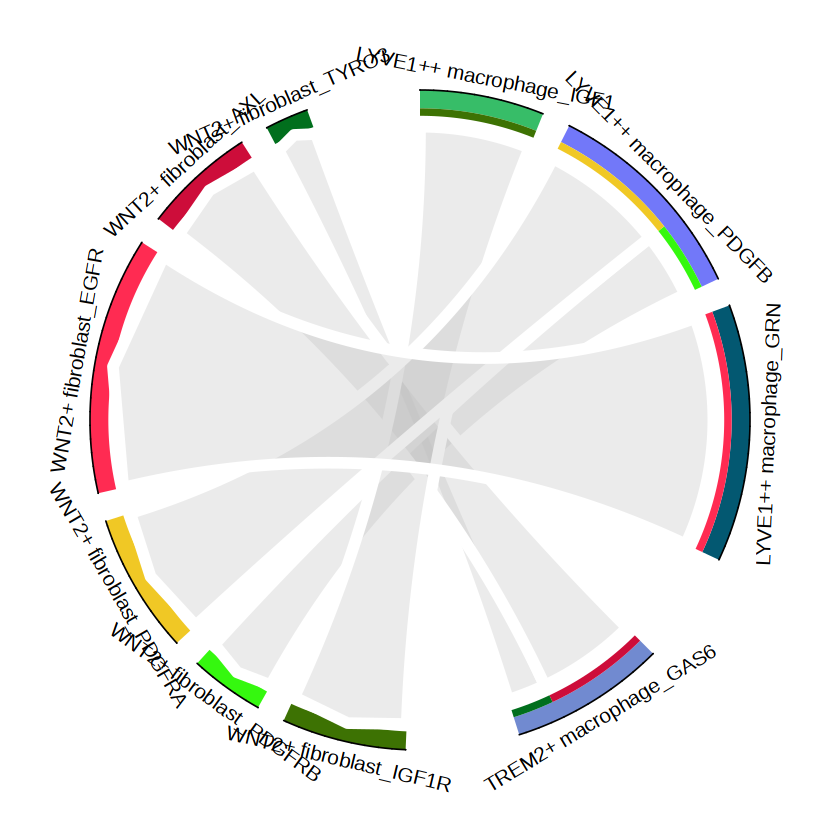

In [31]:
circos.clear()
circos.par(start.degree = 90, gap.degree = 4, track.margin = c(-0.1, 0.1), cell.padding=c(0.02, 10.00, 0.02, 10.00), points.overflow.warning = FALSE)
#par(mar = rep(0, 4))
#cell.padding=c(0.02, 1.00, 0.02, 1.00)

#grid.col=c('Pre-dermal condensate_CXCL12' = "#eed9c4",
#           'Pre-dermal condensate_CXCL2' = "#eed9c4",
#           'ILC2_DPP4' = "#C20078",
#           'ILC2_CXCR4' = '#C20078',
#           'LTi_DPP4' = 'salmon',
#           'LTi_CXCR4' = 'salmon')

# Base plot
chordDiagram(
  x = df_combined, 
  #grid.col = grid.col,
  col='grey',
  transparency = 0.7,
  directional = 1,
  direction.type = c("arrows", "diffHeight"), 
  diffHeight  = 0.05,
  link.target.prop = TRUE,
  target.prop.height = mm_h(1.5), # set to zero to remove 1 layer and set above to False
  preAllocateTracks = NULL,
  annotationTrack = "grid", 
  #annotationTrackHeight = convert_height(c(5, 2), "mm"),
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "big.arrow",
  link.sort = TRUE, 
  link.largest.ontop = TRUE,
  link.border = 'white',
  link.lwd = 7,
  group = group4,
  big.gap = 20,
  small.gap = 5)
# Add text and axis
circos.trackPlotRegion(
  track.index = 1,
  bg.border = NA, 
  panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(
      x = mean(xlim), 
      y = 2, 
      labels = sector.name, 
      niceFacing = TRUE, 
      cex = 1)
      circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0, labels=FALSE, sector.index = sector.name)     
  }
)


In [32]:
circos.info()

All your sectors:
 [1] "LYVE1++ macrophage_IGF1"  "LYVE1++ macrophage_PDGFB"
 [3] "LYVE1++ macrophage_GRN"   "TREM2+ macrophage_GAS6"  
 [5] "WNT2+ fibroblast_IGF1R"   "WNT2+ fibroblast_PDGFRB" 
 [7] "WNT2+ fibroblast_PDGFRA"  "WNT2+ fibroblast_EGFR"   
 [9] "WNT2+ fibroblast_AXL"     "WNT2+ fibroblast_TYRO3"  

All your tracks:
[1] 1

Your current sector.index is WNT2+ fibroblast_TYRO3
Your current track.index is 1


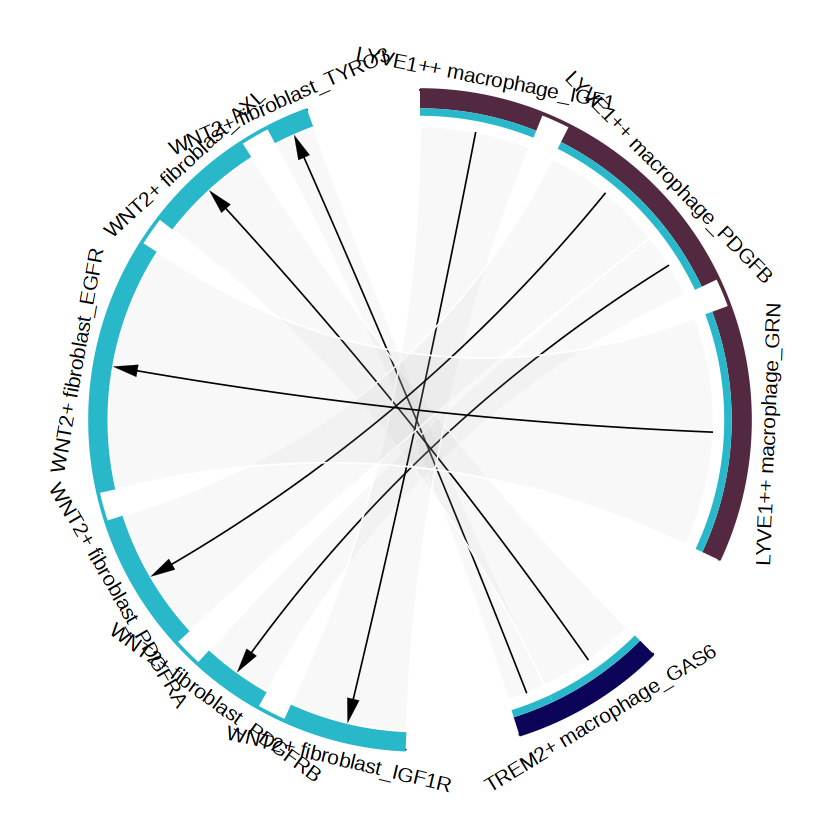

In [33]:
#plot
circos.clear()
#pdf('/home/jovyan/mount_farm/nfs/nfs/team298/hg6/Fetal_skin/out_files/circos_LYVE1_TREM2_WNT2_early_v3.pdf')
circos.par(start.degree = 90, gap.degree = 2, track.margin = c(-0.1, 0.1), cell.padding=c(0.02, 1.00, 0.02, 1.00), points.overflow.warning = FALSE)
#par(mar = rep(0, 4))
#cell.padding=c(0.02, 1.00, 0.02, 1.00)

#Define grid base colors based on sender cell colors
grid.col=c(
'LYVE1++ macrophage_IGF1' = '#532942',
'LYVE1++ macrophage_PDGFB' = '#532942',
'LYVE1++ macrophage_GRN' = '#532942',
'TREM2+ macrophage_GAS6' = '#0c0459',
'WNT2+ fibroblast_IGF1R' = '#29B8C9',
'WNT2+ fibroblast_PDGFRB' = '#29B8C9',
'WNT2+ fibroblast_PDGFRA' = '#29B8C9',
'WNT2+ fibroblast_EGFR' = '#29B8C9',
'WNT2+ fibroblast_AXL' = '#29B8C9',
'WNT2+ fibroblast_TYRO3' = '#29B8C9')

# Base plot
chordDiagram(
  x = df_combined, 
  grid.col = grid.col,
  col = 'grey',
  transparency = 0.9,
  directional = 1,
  direction.type = c("arrows", "diffHeight"), 
  diffHeight  = 0.05,
  link.target.prop = TRUE,
  target.prop.height = mm_h(1.5), # set to zero to remove 1 layer and set above to False
  preAllocateTracks = NULL,
  annotationTrack = "grid", 
  #annotationTrackHeight = convert_height(c(5, 2), "mm"),
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "triangle",
  #link.arr.length = 0.02,
  #link.arr.width = 0.01,
  link.sort = TRUE, 
  link.largest.ontop = TRUE,
  link.border = 'white',
  link.lwd = 1,
  group = group4,
  big.gap = 20,
  small.gap = 5)
# Add text and axis
circos.trackPlotRegion(
  track.index = 1,
  bg.border = NA, 
  panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(
      x = mean(xlim), 
      y = 2, 
      labels = sector.name, 
      facing = "outside",
      niceFacing = TRUE,
      cex = 1)
      circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0, labels=FALSE, sector.index = sector.name)     
  }
)

highlight.sector(c('LYVE1++ macrophage_IGF1', 'LYVE1++ macrophage_PDGFB', 'LYVE1++ macrophage_GRN'), col = '#532942', 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('WNT2+ fibroblast_IGF1R', 'WNT2+ fibroblast_PDGFRB', 'WNT2+ fibroblast_PDGFRA', 'WNT2+ fibroblast_EGFR', 'WNT2+ fibroblast_AXL', 'WNT2+ fibroblast_TYRO3'), col = '#29B8C9', 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('TREM2+ macrophage_GAS6'), col = '#0c0459', 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
gg2 <- recordPlot()
#dev.off()

# TREM2+ macs and neuronal cells

In [34]:
#load csv of summary of early interactions
summary_df_early = means <- read.delim('/home/jovyan/mount_farm/nfs/nfs/team298/hg6/Fetal_skin/data/cpdb_outs/early_fs/summary.tsv', 
                                       check.names = FALSE)
summary_df_early

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
FAM3C|HLA-C,Arterial|ASDC,0.924,0.000,0.0000000
MIF|CD74,Arterial|ASDC,3.147,0.000,0.0000000
GRN|TNFRSF1A,Arterial|ASDC,0.705,0.006,0.3259091
GRN|TNFRSF1B,Arterial|ASDC,0.832,0.000,0.0000000
COPA|CD74,Arterial|ASDC,2.538,0.000,0.0000000
CD44|HBEGF,ASDC|Arterial,0.562,0.030,1.0000000
GRN|SORT1,ASDC|Arterial,0.767,0.000,0.0000000
LGALS9|DAG1,ASDC|Arterial,0.184,0.047,1.0000000
TNF|NOTCH1,ASDC|Arterial,0.486,0.000,0.0000000


In [35]:
#filter to keep only required cell pairs and gene pairs of interest with significant adjusted p-value
required_cellpairs5 = c('TREM2+ macrophage|Myelinating Schwann cells', 'TREM2+ macrophage|PID1+ schwann cellls', 'TREM2+ macrophage|Schwann/Schwann precursors', 'Myelinating Schwann cells|TREM2+ macrophage', 'PID1+ schwann cellls|TREM2+ macrophage', 'Schwann/Schwann precursors|TREM2+ macrophage')
required_genepairs5 = c('VEGFA|NRP1','VEGFA|NRP2','SEMA3E|PLXND1','SEMA3C|NRP2')
filtered_df5 = filter(summary_df_early, celltype_pair %in% required_cellpairs5 & gene_pair %in% required_genepairs5 & padj<0.05)
filtered_df5

gene_pair,celltype_pair,mean,p,padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>
VEGFA|NRP1,TREM2+ macrophage|Myelinating Schwann cells,0.230,0,0
VEGFA|NRP2,TREM2+ macrophage|Myelinating Schwann cells,0.364,0,0
SEMA3E|PLXND1,PID1+ schwann cellls|TREM2+ macrophage,0.210,0,0
VEGFA|NRP1,TREM2+ macrophage|Schwann/Schwann precursors,0.232,0,0
VEGFA|NRP2,TREM2+ macrophage|Schwann/Schwann precursors,0.186,0,0
SEMA3C|NRP2,Myelinating Schwann cells|TREM2+ macrophage,0.798,0,0
SEMA3C|NRP2,PID1+ schwann cellls|TREM2+ macrophage,0.624,0,0
VEGFA|NRP2,Schwann/Schwann precursors|TREM2+ macrophage,0.360,0,0
SEMA3C|NRP2,Schwann/Schwann precursors|TREM2+ macrophage,0.921,0,0


In [36]:
#separate sender/receiver cells and ligand/receptor genes
filtered_df5 <- filtered_df5 %>% separate(celltype_pair, c("sender", "receiver"), "\\|")
filtered_df5 <- filtered_df5 %>% separate(gene_pair, c("ligand", "receptor"), "\\|")
filtered_df5

ligand,receptor,sender,receiver,mean,p,padj
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
VEGFA,NRP1,TREM2+ macrophage,Myelinating Schwann cells,0.230,0,0
VEGFA,NRP2,TREM2+ macrophage,Myelinating Schwann cells,0.364,0,0
SEMA3E,PLXND1,PID1+ schwann cellls,TREM2+ macrophage,0.210,0,0
VEGFA,NRP1,TREM2+ macrophage,Schwann/Schwann precursors,0.232,0,0
VEGFA,NRP2,TREM2+ macrophage,Schwann/Schwann precursors,0.186,0,0
SEMA3C,NRP2,Myelinating Schwann cells,TREM2+ macrophage,0.798,0,0
SEMA3C,NRP2,PID1+ schwann cellls,TREM2+ macrophage,0.624,0,0
VEGFA,NRP2,Schwann/Schwann precursors,TREM2+ macrophage,0.360,0,0
SEMA3C,NRP2,Schwann/Schwann precursors,TREM2+ macrophage,0.921,0,0


In [37]:
#create cell_gene pairs for plot sections
filtered_df5$from <- paste(filtered_df5$sender, filtered_df5$ligand, sep='_')
filtered_df5$to <- paste(filtered_df5$receiver, filtered_df5$receptor, sep='_')
filtered_df5

ligand,receptor,sender,receiver,mean,p,padj,from,to
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
VEGFA,NRP1,TREM2+ macrophage,Myelinating Schwann cells,0.230,0,0,TREM2+ macrophage_VEGFA,Myelinating Schwann cells_NRP1
VEGFA,NRP2,TREM2+ macrophage,Myelinating Schwann cells,0.364,0,0,TREM2+ macrophage_VEGFA,Myelinating Schwann cells_NRP2
SEMA3E,PLXND1,PID1+ schwann cellls,TREM2+ macrophage,0.210,0,0,PID1+ schwann cellls_SEMA3E,TREM2+ macrophage_PLXND1
VEGFA,NRP1,TREM2+ macrophage,Schwann/Schwann precursors,0.232,0,0,TREM2+ macrophage_VEGFA,Schwann/Schwann precursors_NRP1
VEGFA,NRP2,TREM2+ macrophage,Schwann/Schwann precursors,0.186,0,0,TREM2+ macrophage_VEGFA,Schwann/Schwann precursors_NRP2
SEMA3C,NRP2,Myelinating Schwann cells,TREM2+ macrophage,0.798,0,0,Myelinating Schwann cells_SEMA3C,TREM2+ macrophage_NRP2
SEMA3C,NRP2,PID1+ schwann cellls,TREM2+ macrophage,0.624,0,0,PID1+ schwann cellls_SEMA3C,TREM2+ macrophage_NRP2
VEGFA,NRP2,Schwann/Schwann precursors,TREM2+ macrophage,0.360,0,0,Schwann/Schwann precursors_VEGFA,TREM2+ macrophage_NRP2
SEMA3C,NRP2,Schwann/Schwann precursors,TREM2+ macrophage,0.921,0,0,Schwann/Schwann precursors_SEMA3C,TREM2+ macrophage_NRP2


In [38]:
#re-order columns
filtered_df5 <- filtered_df5[, c('from', 'to', 'mean', 'sender', 'receiver', 'ligand', 'receptor')]
filtered_df5

from,to,mean,sender,receiver,ligand,receptor
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
TREM2+ macrophage_VEGFA,Myelinating Schwann cells_NRP1,0.230,TREM2+ macrophage,Myelinating Schwann cells,VEGFA,NRP1
TREM2+ macrophage_VEGFA,Myelinating Schwann cells_NRP2,0.364,TREM2+ macrophage,Myelinating Schwann cells,VEGFA,NRP2
PID1+ schwann cellls_SEMA3E,TREM2+ macrophage_PLXND1,0.210,PID1+ schwann cellls,TREM2+ macrophage,SEMA3E,PLXND1
TREM2+ macrophage_VEGFA,Schwann/Schwann precursors_NRP1,0.232,TREM2+ macrophage,Schwann/Schwann precursors,VEGFA,NRP1
TREM2+ macrophage_VEGFA,Schwann/Schwann precursors_NRP2,0.186,TREM2+ macrophage,Schwann/Schwann precursors,VEGFA,NRP2
Myelinating Schwann cells_SEMA3C,TREM2+ macrophage_NRP2,0.798,Myelinating Schwann cells,TREM2+ macrophage,SEMA3C,NRP2
PID1+ schwann cellls_SEMA3C,TREM2+ macrophage_NRP2,0.624,PID1+ schwann cellls,TREM2+ macrophage,SEMA3C,NRP2
Schwann/Schwann precursors_VEGFA,TREM2+ macrophage_NRP2,0.360,Schwann/Schwann precursors,TREM2+ macrophage,VEGFA,NRP2
Schwann/Schwann precursors_SEMA3C,TREM2+ macrophage_NRP2,0.921,Schwann/Schwann precursors,TREM2+ macrophage,SEMA3C,NRP2


In [39]:
#create groups by cell type
nm5 = unique(unlist(c(filtered_df5$from, filtered_df5$to)))
nm5
group5 = structure(gsub("_.*", "", nm5), names = nm5)
group5

[1] "TREM2+ macrophage_VEGFA"           "PID1+ schwann cellls_SEMA3E"      
 [3] "Myelinating Schwann cells_SEMA3C"  "PID1+ schwann cellls_SEMA3C"      
 [5] "Schwann/Schwann precursors_VEGFA"  "Schwann/Schwann precursors_SEMA3C"
 [7] "Myelinating Schwann cells_NRP1"    "Myelinating Schwann cells_NRP2"   
 [9] "TREM2+ macrophage_PLXND1"          "Schwann/Schwann precursors_NRP1"  
[11] "Schwann/Schwann precursors_NRP2"   "TREM2+ macrophage_NRP2"

TREM2+ macrophage_VEGFA       PID1+ schwann cellls_SEMA3E 
              "TREM2+ macrophage"            "PID1+ schwann cellls" 
 Myelinating Schwann cells_SEMA3C       PID1+ schwann cellls_SEMA3C 
      "Myelinating Schwann cells"            "PID1+ schwann cellls" 
 Schwann/Schwann precursors_VEGFA Schwann/Schwann precursors_SEMA3C 
     "Schwann/Schwann precursors"      "Schwann/Schwann precursors" 
   Myelinating Schwann cells_NRP1    Myelinating Schwann cells_NRP2 
      "Myelinating Schwann cells"       "Myelinating Schwann cells" 
         TREM2+ macrophage_PLXND1   Schwann/Schwann precursors_NRP1 
              "TREM2+ macrophage"      "Schwann/Schwann precursors" 
  Schwann/Schwann precursors_NRP2            TREM2+ macrophage_NRP2 
     "Schwann/Schwann precursors"               "TREM2+ macrophage"

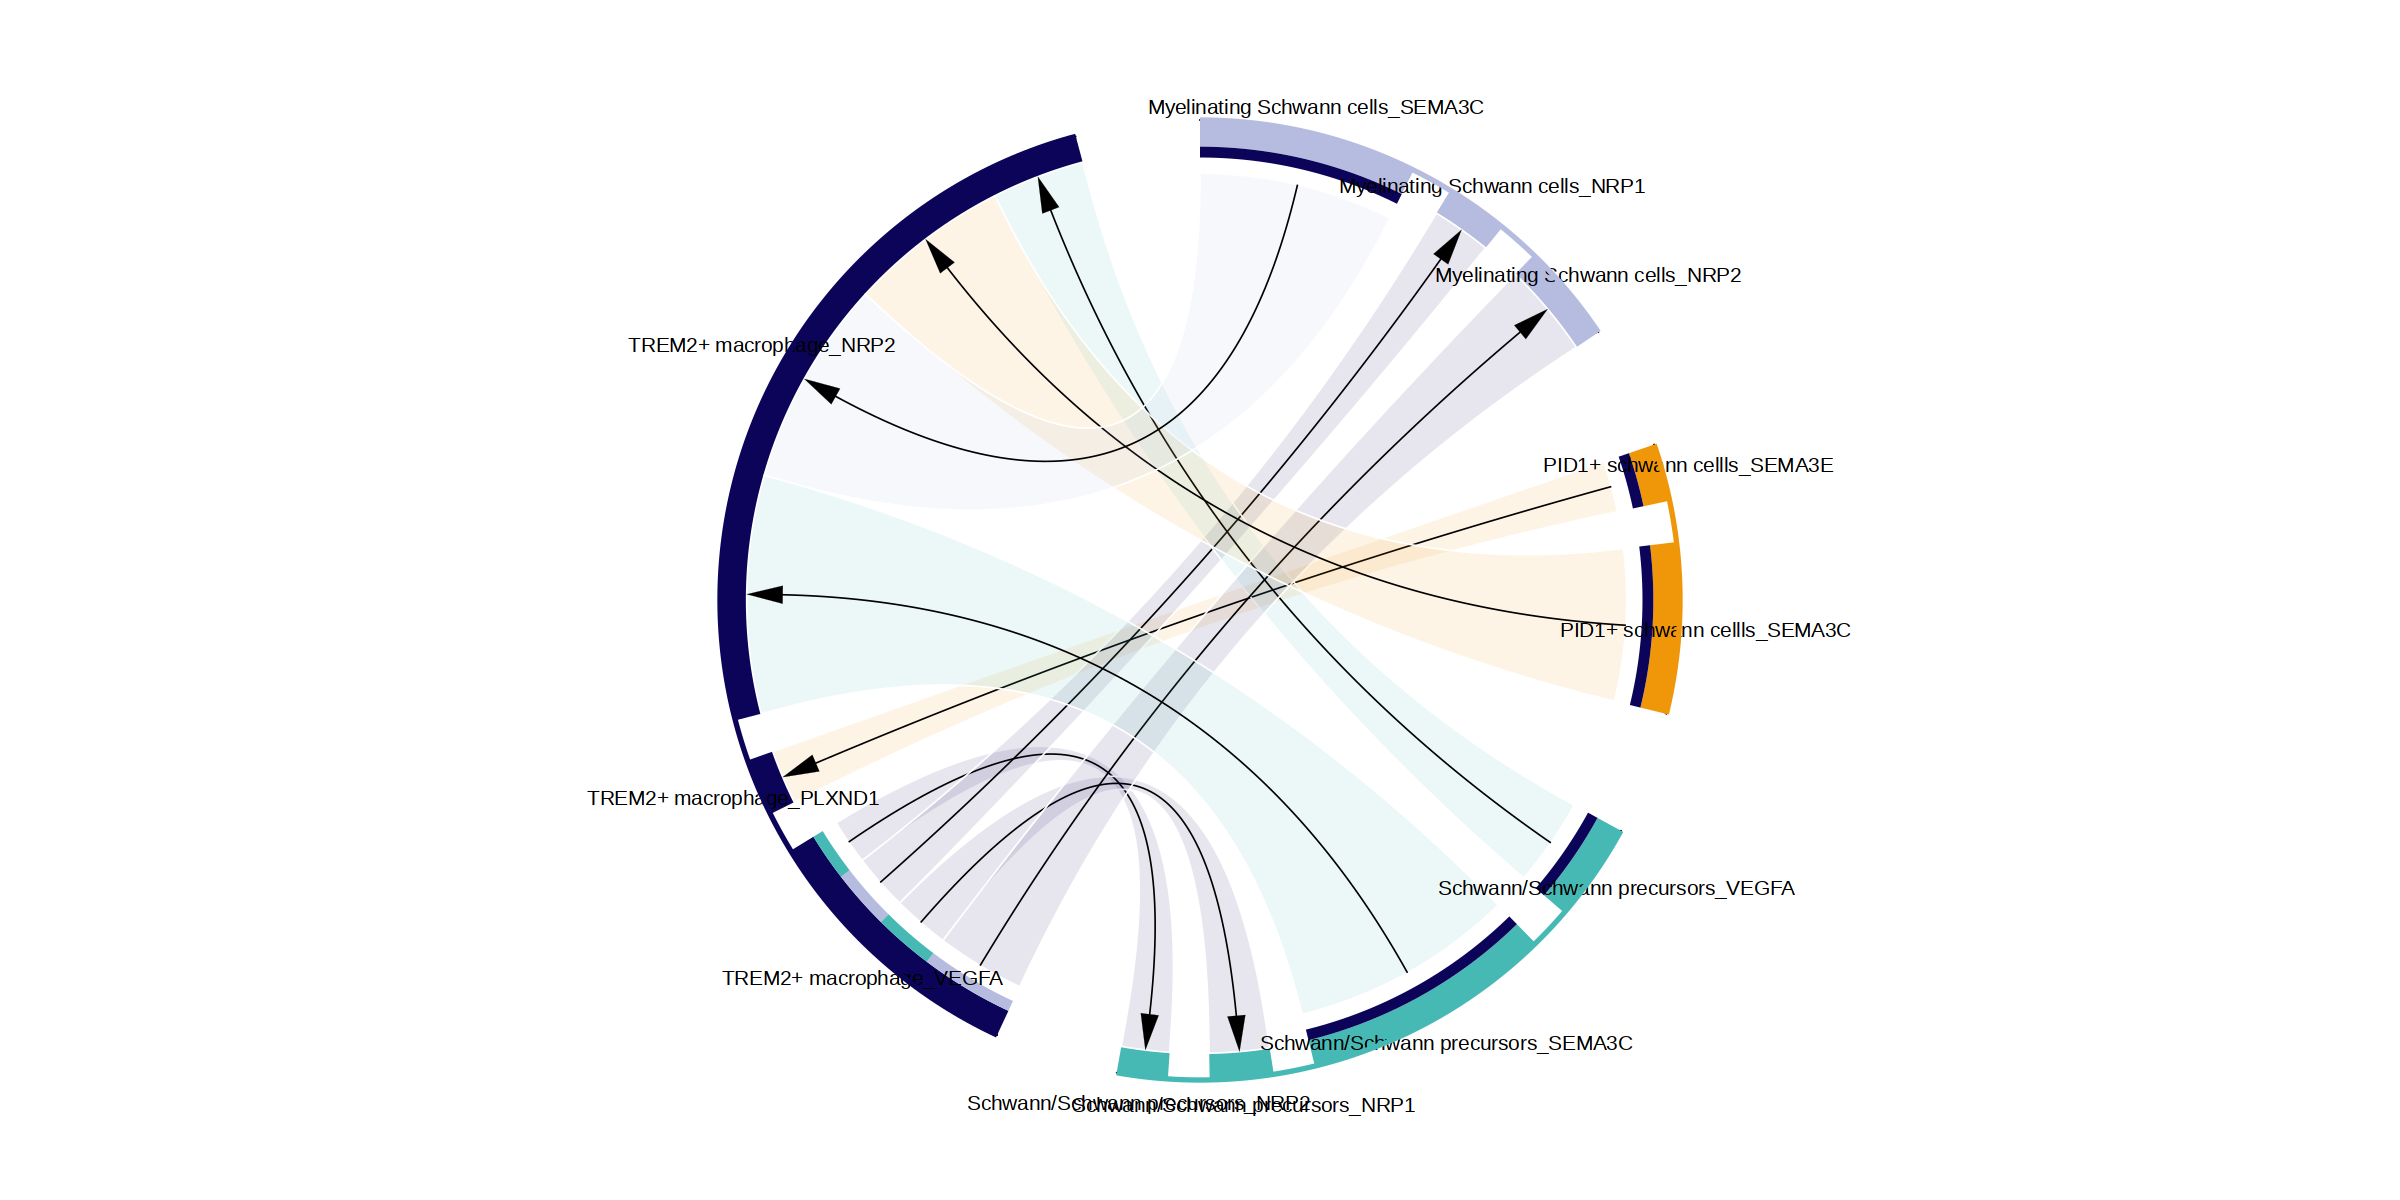

In [40]:
options(repr.plot.width=20, repr.plot.height=10)
circos.clear()
#pdf('/home/jovyan/mount_farm/nfs/nfs/team298/hg6/Fetal_skin/out_files/circos_TREM2_neuron_grey.pdf', width =15, height=10)
circos.par(start.degree = 90, gap.degree = 4, track.margin = c(-0.1, 0.1), cell.padding=c(0.02, 1.00, 0.02, 1.00), points.overflow.warning = FALSE)
#par(mar = rep(0, 4))
#cell.padding=c(0.02, 1.00, 0.02, 1.00)

#Define grid base colors based on sender cell colors
grid.col=c(
'TREM2+ macrophage_VEGFA' = '#0c0459',
'TREM2+ macrophage_NRP2' = '#0c0459',
'TREM2+ macrophage_PLXND1' = '#0c0459',
'PID1+ schwann cellls_SEMA3E' = '#F09709',
'PID1+ schwann cellls_SEMA3C' = '#F09709',
'Myelinating Schwann cells_SEMA3C' = "#B6BCE0",
'Myelinating Schwann cells_NRP1' = "#B6BCE0",
'Myelinating Schwann cells_NRP2' = "#B6BCE0",
'Schwann/Schwann precursors_VEGFA' = "#47B9B5",
'Schwann/Schwann precursors_SEMA3C' = "#47B9B5",
'Schwann/Schwann precursors_NRP1' = "#47B9B5",
'Schwann/Schwann precursors_NRP2' = "#47B9B5")

col = c(
'#0c0459',
'#0c0459',
'#F09709',
'#0c0459',
'#0c0459',
"#B6BCE0",
'#F09709',
"#47B9B5",
"#47B9B5")

# Base plot
chordDiagram(
  x = filtered_df5, 
  grid.col = grid.col,
  col = col,
  transparency = 0.9,
  directional = 1,
  direction.type = c("arrows", "diffHeight"), 
  diffHeight  = 0.05,
  link.target.prop = TRUE,
  target.prop.height = mm_h(1.5), # set to zero to remove 1 layer and set above to False
  preAllocateTracks = NULL,
  annotationTrack = "grid", 
  #annotationTrackHeight = convert_height(c(5, 2), "mm"),
  annotationTrackHeight = c(0.05, 0.1),
  link.arr.type = "triangle",
  #link.arr.length = 0.02,
  #link.arr.width = 0.01,
  link.sort = TRUE, 
  link.largest.ontop = TRUE,
  link.border = 'white',
  link.lwd = 1,
  group = group5,
  big.gap = 15,
  small.gap = 5)
# Add text and axis
circos.trackPlotRegion(
  track.index = 1,
  bg.border = NA, 
  panel.fun = function(x, y) {
    xlim = get.cell.meta.data("xlim")
    ylim = get.cell.meta.data("ylim")
    sector.name = get.cell.meta.data("sector.index")
    circos.text(
      x = mean(xlim), 
      y = 2, 
      labels = sector.name, 
      facing = "downward",
     niceFacing = TRUE,
      cex = 1)
      circos.axis(h = "top", labels.cex = 0.5, major.tick.length = 0, labels=FALSE, sector.index = sector.name)     
  }
)

highlight.sector(c('TREM2+ macrophage_VEGFA', 'TREM2+ macrophage_NRP2', 'TREM2+ macrophage_PLXND1'), col = '#0c0459', 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('PID1+ schwann cellls_SEMA3E', 'PID1+ schwann cellls_SEMA3C'), col = '#F09709', 
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('Myelinating Schwann cells_SEMA3C', 'Myelinating Schwann cells_NRP1', 'Myelinating Schwann cells_NRP2'), col = "#B6BCE0",
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
highlight.sector(c('Schwann/Schwann precursors_VEGFA', 'Schwann/Schwann precursors_SEMA3C', 'Schwann/Schwann precursors_NRP1', 
                   'Schwann/Schwann precursors_NRP2'), col = "#47B9B5",
                 cex = 1, text.col = "white", niceFacing = TRUE, padding = c(-1.1, 0, -0.1, 0),font=2)
#dev.off()

In [41]:
circos.info()

All your sectors:
 [1] "Myelinating Schwann cells_SEMA3C"  "Myelinating Schwann cells_NRP1"   
 [3] "Myelinating Schwann cells_NRP2"    "PID1+ schwann cellls_SEMA3E"      
 [5] "PID1+ schwann cellls_SEMA3C"       "Schwann/Schwann precursors_VEGFA" 
 [7] "Schwann/Schwann precursors_SEMA3C" "Schwann/Schwann precursors_NRP1"  
 [9] "Schwann/Schwann precursors_NRP2"   "TREM2+ macrophage_VEGFA"          
[11] "TREM2+ macrophage_PLXND1"          "TREM2+ macrophage_NRP2"           

All your tracks:
[1] 1

Your current sector.index is TREM2+ macrophage_NRP2
Your current track.index is 1
